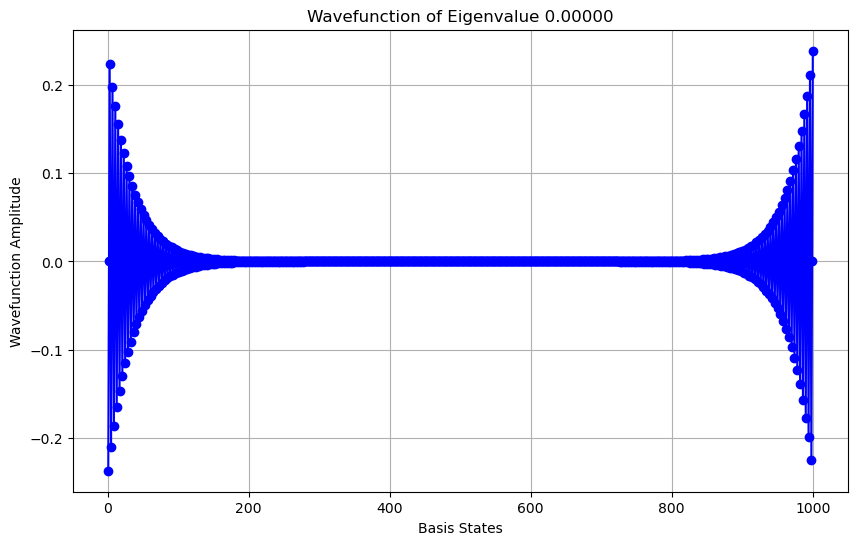

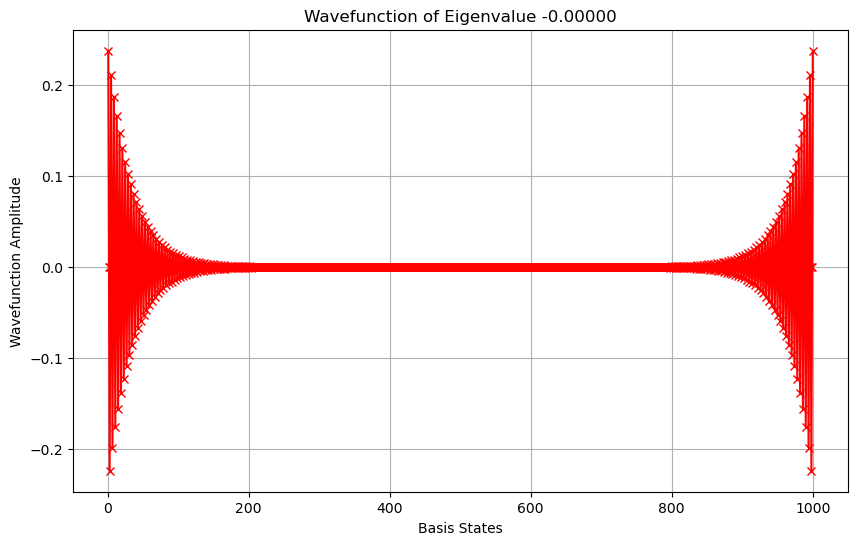

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh

N = 500 # Number of unit cells
t = 10
delta_t = -0.3

dim = 2 * N  # Each unit cell contributes 2 basis states (A and B)


H_matrix = np.zeros((dim, dim))


for i in range(N):
    # Hopping between A_i and B_i
    H_matrix[2 * i, 2 * i + 1] = t + delta_t
    H_matrix[2 * i + 1, 2 * i] = t + delta_t  # Hermitian conjugate
    
    # Hopping between B_i and A_(i+1)
    if i < N - 1:
        H_matrix[2 * i + 1, 2 * (i + 1)] = t - delta_t
        H_matrix[2 * (i + 1), 2 * i + 1] = t - delta_t  # Hermitian conjugate


eigenvalues, eigenvectors = np.linalg.eig(H_matrix)


# Find the indices of the two eigenvalues nearest to zero
nearest_indices = np.argsort(np.abs(eigenvalues))[:2]  # Sort by absolute value and take the first two

# Extract the eigenvalues and corresponding eigenvectors
nearest_eigenvalues = eigenvalues[nearest_indices]
nearest_eigenvectors = eigenvectors[:, nearest_indices]

# Basis states
basis_states = np.arange(1, 2 * N + 1)

# Plot the first eigenvector
plt.figure(figsize=(10, 6))
plt.plot(basis_states, nearest_eigenvectors[:, 0], marker='o', linestyle='-', color='b')
plt.xlabel("Basis States")
plt.ylabel("Wavefunction Amplitude")
plt.title(f"Wavefunction of Eigenvalue {nearest_eigenvalues[0]:.5f}")
plt.grid(True)
plt.show()

# Plot the second eigenvector
plt.figure(figsize=(10, 6))
plt.plot(basis_states, nearest_eigenvectors[:, 1], marker='x', linestyle='-', color='r')
plt.xlabel("Basis States")
plt.ylabel("Wavefunction Amplitude")
plt.title(f"Wavefunction of Eigenvalue {nearest_eigenvalues[1]:.5f}")
plt.grid(True)
plt.show()


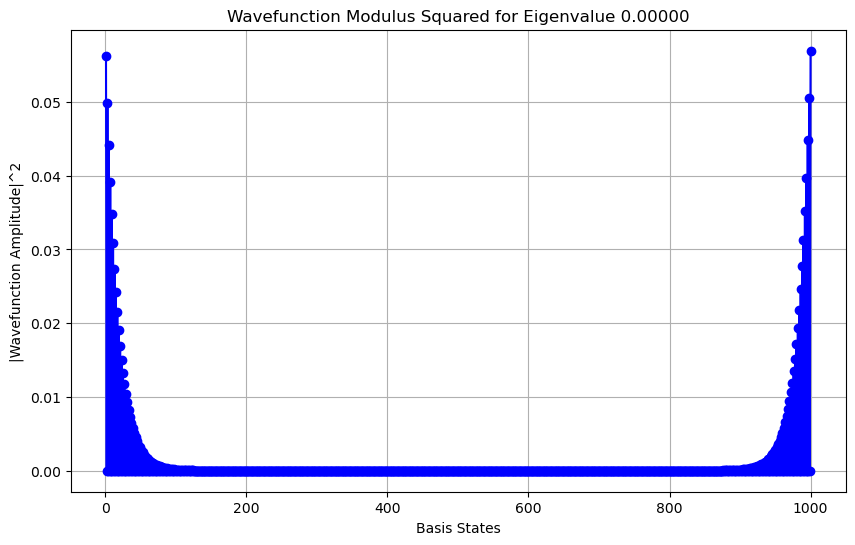

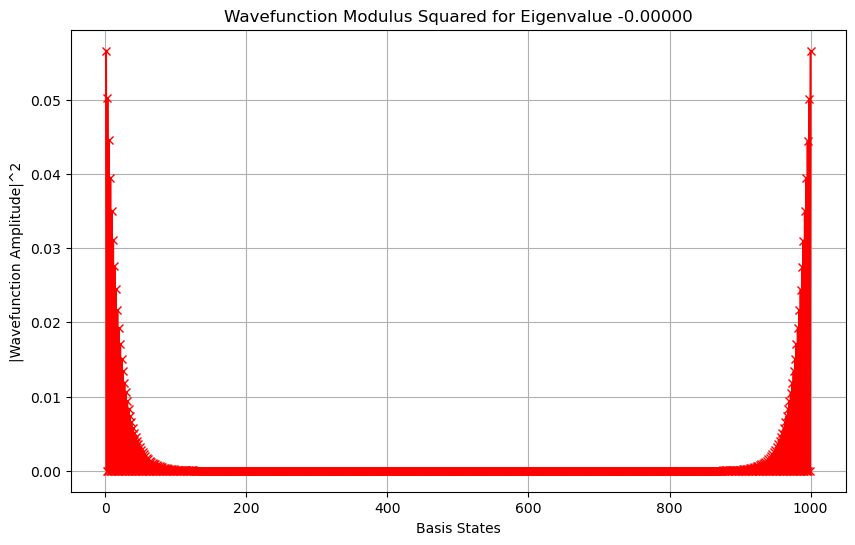

In [6]:
# Compute the modulus square of the wavefunctions
wavefunctions_mod_squared = np.abs(nearest_eigenvectors) ** 2

# Plot the modulus square of the first eigenvector
plt.figure(figsize=(10, 6))
plt.plot(basis_states, wavefunctions_mod_squared[:, 0], marker='o', linestyle='-', color='b')
plt.xlabel("Basis States")
plt.ylabel("|Wavefunction Amplitude|^2")
plt.title(f"Wavefunction Modulus Squared for Eigenvalue {nearest_eigenvalues[0]:.5f}")
plt.grid(True)
plt.show()

# Plot the modulus square of the second eigenvector
plt.figure(figsize=(10, 6))
plt.plot(basis_states, wavefunctions_mod_squared[:, 1], marker='x', linestyle='-', color='r')
plt.xlabel("Basis States")
plt.ylabel("|Wavefunction Amplitude|^2")
plt.title(f"Wavefunction Modulus Squared for Eigenvalue {nearest_eigenvalues[1]:.5f}")
plt.grid(True)
plt.show()

In [22]:
a = 1.0       
M = 20 * N
k_points = np.linspace(-np.pi / a, np.pi / a, M, endpoint=False)  # BZ points
overlaps = []

# first eigenvector
k = k_points[0]
H_k = np.array([
    [0, (t + delta_t) + (t - delta_t) * np.exp(1j * k * a)],
    [(t + delta_t) + (t - delta_t) * np.exp(-1j * k * a), 0]
])
_, prev_eigenvectors = eigh(H_k)
prev_eigenvector = prev_eigenvectors[:, 0]  # Lower band eigenvector

# Loop over k-points to compute overlaps
for k in k_points[1:]:
    H_k = np.array([
        [0, (t + delta_t) + (t - delta_t) * np.exp(1j * k * a)],
        [(t + delta_t) + (t - delta_t) * np.exp(-1j * k * a), 0]
    ])
    
    _, eigenvectors = eigh(H_k)
    current_eigenvector = eigenvectors[:, 0]
    
    # Calculate overlap with the previous eigenvector
    overlap = np.vdot(prev_eigenvector, current_eigenvector)
    overlaps.append(overlap)
    
    prev_eigenvector = current_eigenvector

# Berry phase
product_of_overlaps = np.prod(overlaps)
berry_phase = np.angle(product_of_overlaps)

# Ensure the Berry phase is in the range [0, 2π]
if berry_phase < 0:
    berry_phase += 2 * np.pi

e = 1.0
P = (e / (2 * np.pi)) * berry_phase

print(f"Berry Phase (ϕ_n): {berry_phase:.4f} radians")
print(f"Polarization (P_n): {P:.4f}")


Berry Phase (ϕ_n): 6.2830 radians
Polarization (P_n): 1.0000


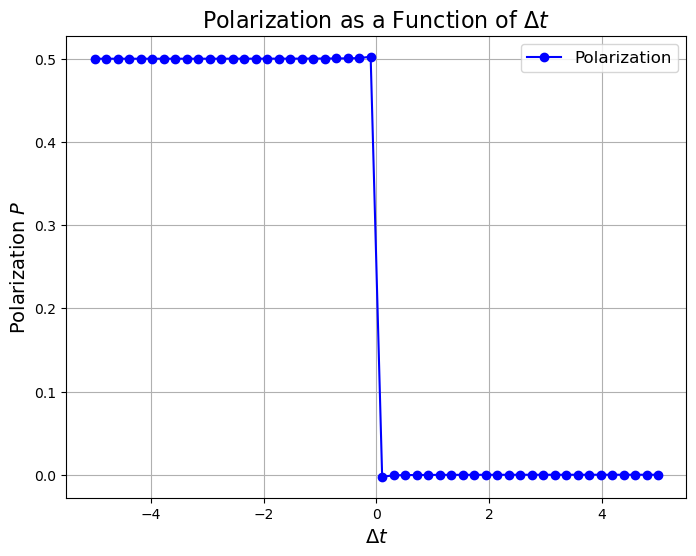

In [24]:
delta_t_values = np.linspace(-5, 5, 50)
polarizations = []

for delta_t in delta_t_values:
    overlaps = []

    k = k_points[0]
    H_k = np.array([
        [0, (t + delta_t) + (t - delta_t) * np.exp(1j * k * a)],
        [(t + delta_t) + (t - delta_t) * np.exp(-1j * k * a), 0]
    ])
    _, prev_eigenvectors = eigh(H_k)
    prev_eigenvector = prev_eigenvectors[:, 0]  # Lower band eigenvector

    for k in k_points[1:]:
        H_k = np.array([
            [0, (t + delta_t) + (t - delta_t) * np.exp(1j * k * a)],
            [(t + delta_t) + (t - delta_t) * np.exp(-1j * k * a), 0]
        ])
        _, eigenvectors = eigh(H_k)
        current_eigenvector = eigenvectors[:, 0]
        
        # Calculate overlap with the previous eigenvector
        overlap = np.vdot(prev_eigenvector, current_eigenvector)
        overlaps.append(overlap)
        prev_eigenvector = current_eigenvector

    product_of_overlaps = np.prod(overlaps)
    berry_phase = np.angle(product_of_overlaps)

    # Ensure the Berry phase is in the range [0, 2π]
    if berry_phase < -0.3:
        berry_phase += 2 * np.pi

    e = 1.0
    P = (e / (2 * np.pi)) * berry_phase
    polarizations.append(P)

plt.figure(figsize=(8, 6))
plt.plot(delta_t_values, polarizations, marker='o', linestyle='-', color='b', label="Polarization")
plt.xlabel(r"$\Delta t$", fontsize=14)
plt.ylabel(r"Polarization $P$", fontsize=14)
plt.title(r"Polarization as a Function of $\Delta t$", fontsize=16)
plt.grid(True)
plt.legend(fontsize=12)
plt.show()